# Music Churn:  Predictive Modeling Notebook
Python Notebook 2 of 3

## W207, Final Project
Spring, 2018

Team:  Cameron Kennedy, Gaurav Khanna, Aaron Olson

## Overview of Notebooks
For this project, the team created 3 separate Jupyter Notebooks to document its work.  See notebook #1, (Data Preparation / Feature Extraction) for a brief description of each notebook.

## Table of Contents (this notebook only)

1. Setup and Loading Libraries
2. Data Preparation
3. Predictive Modeling! 
4. Calculating Probabilities
5. Economic Impact
6. Final Insights and Takeaways


# 1. Setup and Loading Libraries

In [3]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!

#Metrics
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, 
    precision_score, confusion_matrix, classification_report)

Now we'll load the data and print the first few rows:

In [4]:
# Load the data
df_fa = pd.read_pickle('df_fa.pkl')  #Pickle format preserves file as python object

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 2000

#Ensure it's what we expect:
print(df_fa.shape)
df_fa.head()

(88544, 151)


,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
msno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,13,20170120,0,35,1,1,1,10.

In [5]:
df_fa.describe(include='all')

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
count,88544.000000,88544.000000,88544.000000,8.854400e+04,88544.000000,88544.000000,88544.000000,88544.000000,88544.0,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000

# 2. Data Preparation

## Splitting Train, Dev, and Test

First, we need to split the data into our train, dev, and test sets, which we'll do at rates of 60%, 25%, and 15% respectively.

In [6]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Calculate churn percentages
churn_rate_all = df_fa['is_churn'].sum() / df_fa['is_churn'].count()
churn_rate_train = train['is_churn'].sum() / train['is_churn'].count()
churn_rate_dev = dev['is_churn'].sum() / dev['is_churn'].count()
churn_rate_test = test['is_churn'].sum() / test['is_churn'].count()

#Print churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(churn_rate_all))
print('Train data, % churn: {:.1%}'.format(churn_rate_train))
print('  Dev data, % churn: {:.1%}'.format(churn_rate_dev))
print(' Test data, % churn: {:.1%}'.format(churn_rate_test))

#Reduce dev set to 6% churn
#Select x rows is_churn == 1; append to all rows where is_churn == 0
churn_rate_actual = 0.11  #Emperically this works
dev_churn_split_factor = (churn_rate_dev * churn_rate_actual) / (1 - churn_rate_actual)
dummy, dev_sub = train_test_split(dev[dev.is_churn==1], test_size=dev_churn_split_factor)
dev = pd.concat([dev[dev.is_churn==0], dev_sub], ignore_index=True)

#Reduce test set to 6% churn
test_churn_split_factor = (churn_rate_test * churn_rate_actual) / (1 - churn_rate_actual)
dummy, test_sub = train_test_split(test[test.is_churn==1], test_size=test_churn_split_factor)
test = pd.concat([test[test.is_churn==0], test_sub], ignore_index=True)

#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy (dev): {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))
print('Baseline Accuracy (test): {:.2%}'.format(1-(test['is_churn'].sum() / test['is_churn'].count())))

Check churn percentages:
  All data, % churn: 50.6%
Train data, % churn: 50.7%
  Dev data, % churn: 50.4%
 Test data, % churn: 50.2%

Check data sizes:
Train data / test:  (53126, 150) (53126,)
  Dev data / test:  (11681, 150) (11681,)
 Test data / test:  (7024, 150) (7024,)

Baseline Accuracy (dev): 94.05%
Baseline Accuracy (test): 94.09%


Of note, the overall data has a churn rate of roughly 6% (~6% of users churn, ~94% stay).  However, because we want our model to train well on both churned and non-churned users, this data set is split roughly 50/50 between churn and non-churn users.  So we use this 50/50 split to on our 'train' data set, but we reduce it back to 6/94 for both our 'dev' and 'test' data sets, by removing most of the churn cases after data is split into train, dev, and test.  In our initial models, we had not yet peformed the 50/50 spilt of the training data, and our best recall score (of the dev data) was 78%.  Upon making this change to 50/50, our recall score of our best models improved dramattically, to 96%!

Having split our data, we perform some quick inspections:

In [7]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Columns: 150 entries, city to registration_time
dtypes: float64(61), int64(87), uint8(2)
memory usage: 13.2 MB


In [8]:
dev_data.isnull().sum(axis=0)

city                                 0
bd                                   0
registered_via                       0
registration_init_time               0
date_featuresdatelistening_tenure    0
within_days_1num_unqsum              0
within_days_1num_unqmean             0
within_days_1num_unqcount            0
within_days_1total_secssum           0
within_days_1total_secsmean          0
within_days_1num_25sum               0
within_days_1num_25mean              0
within_days_1num_50sum               0
within_days_1num_50mean              0
within_days_1num_75sum               0
within_days_1num_75mean              0
within_days_1num_985sum              0
within_days_1num_985mean             0
within_days_1num_100sum              0
within_days_1num_100mean             0
within_days_7num_unqsum              0
within_days_7num_unqmean             0
within_days_7num_unqcount            0
within_days_7total_secssum           0
within_days_7total_secsmean          0
within_days_7num_25sum   

In [9]:
dev_data.describe(include='all')

,city,bd,registered_via,registration_init_time,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
count,11681.000000,11681.000000,11681.000000,1.168100e+04,11681.000000,11681.000000,11681.000000,11681.0,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681.000000,11681

# 3. Predictive Modeling!

With our data in good shape, we move on to build predictive models.

We begin by building a couple functions to help automate the evaluation of our models:

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), size=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

    
def summarize_results(classifier):

    #Print Results
    print('Accuracy: {:.2%}'.format(classifier.score(dev_data, dev_labels)))
    print(classification_report(dev_labels, classifier.predict(dev_data)))
    
    #Plot Results
    class_names = [0, 1]

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(dev_labels, classifier.predict(dev_data))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion Matrix')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized Confusion Matrix')

    plt.show()

### Model Evaluation
We're placing an emphasis on recall as our primary metric, moreso than accuracy. Our thinking here is that accuracy has a 'baseline' of 94% (predicting all 0's, i.e., no users churn), making our current best prediction of ~98% much less impressive. Moreover, we're okay with some false positives but would prefer to minimize false negatives. In other words, we'd rather predict a few customers as likely to churn when in fact they would actually stay (false positives) as opposed to predicting customers who would stay but who actually churn (false negatives). This assumption presumes that the long-term cost of keeping customers (for example, the cost of offering discounts) is less than the long-term loss associated with losing customers. Admittedly, more domain knowledge would be required to validate this assumption, but we consider that validation beyond the scope of the project.

In summary, though we calculate several evaluation metrics below, recall is our primary scoring metric, so long as we have a reasonably low False Positive rate.

### Poorly Performing Classifiers
We initially tried a few different models:

* Gaussian Naive Bayes
* K-Nearest Neighbors
* Support Vector Machines

None of these had promising results, as shown in the output of the cell below.

Note, though not shown here, the team explored several tuning options with these classifiers, but none of them performed as well as the classifiers further down.

NAIVE BAYES CLASSIFIER
Accuracy: 93.97%
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     10986
          1       0.09      0.00      0.00       695

avg / total       0.89      0.94      0.91     11681

Confusion Matrix
[[10976    10]
 [  694     1]]
Normalized Confusion Matrix
[[9.99e-01 9.10e-04]
 [9.99e-01 1.44e-03]]


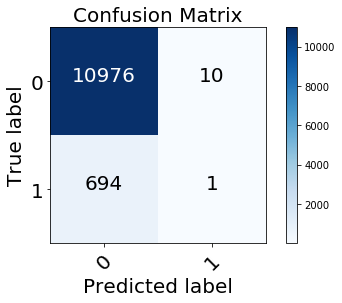

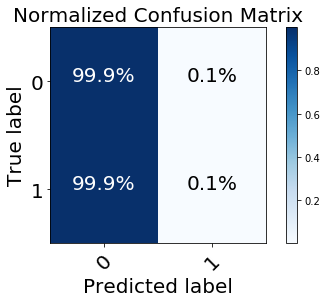

KNN CLASSIFIER
Accuracy: 68.37%
             precision    recall  f1-score   support

          0       0.95      0.70      0.81     10986
          1       0.09      0.45      0.14       695

avg / total       0.90      0.68      0.77     11681

Confusion Matrix
[[7676 3310]
 [ 385  310]]
Normalized Confusion Matrix
[[0.7  0.3 ]
 [0.55 0.45]]


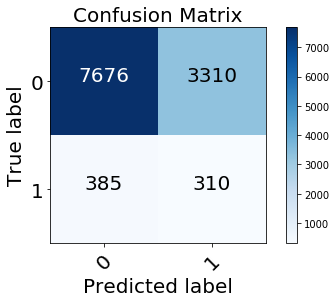

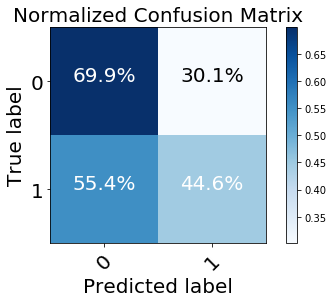

SVM CLASSIFIER


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=640).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy: 6.06%
             precision    recall  f1-score   support

          0       1.00      0.00      0.00     10986
          1       0.06      1.00      0.11       695

avg / total       0.94      0.06      0.01     11681

Confusion Matrix
[[   13 10973]
 [    0   695]]
Normalized Confusion Matrix
[[0. 1.]
 [0. 1.]]


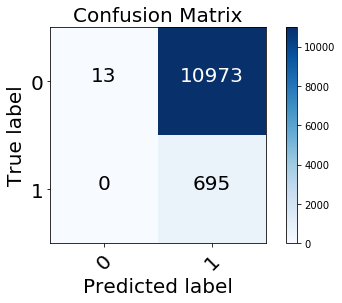

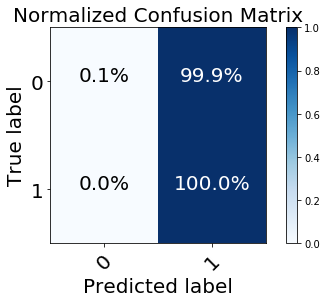

In [17]:
### NB Attempt ###
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('NAIVE BAYES CLASSIFIER')
summarize_results(clf_NB_Gauss)

### KNN Attempt ###
print('KNN CLASSIFIER')
clf_neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=8)  #Accuracy plateaus around n=10, all 0's
clf_neigh.fit(train_data, train_labels)
summarize_results(clf_neigh)

#### SVM Attempts ###
print('SVM CLASSIFIER')
clf_SVM = svm.SVC(kernel='rbf', C=1, max_iter=640, probability = True)  #max_iter=635 gives 6% accuracy ... need new approach / tuning
clf_SVM.fit(train_data, train_labels)
summarize_results(clf_SVM)

### Random Forest Classifier

Having had little success with the classifiers above, we next tried a random forest, which performed very well:

Accuracy: 95.86%
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10986
          1       0.59      0.98      0.74       695

avg / total       0.97      0.96      0.96     11681

Confusion Matrix
[[10518   468]
 [   16   679]]
Normalized Confusion Matrix
[[0.96 0.04]
 [0.02 0.98]]


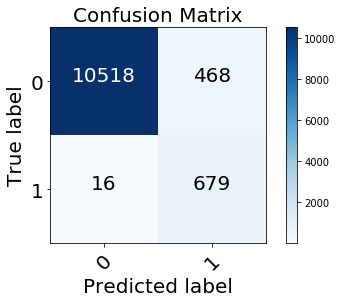

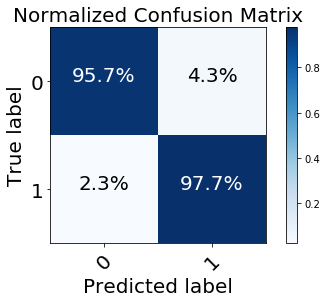

In [12]:
### Random Forest Attempt ###
clf_RF = RandomForestClassifier(n_jobs=8, n_estimators=23, class_weight={0: 1, 1: 1}, criterion='gini')
clf_RF.fit(train_data, train_labels)
summarize_results(clf_RF)

### XGBoost Classifier

Next, we tried an XGBoost classifier

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 95.49%
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     10986
          1       0.57      0.98      0.72       695

avg / total       0.97      0.95      0.96     11681

Confusion Matrix
[[10476   510]
 [   17   678]]
Normalized Confusion Matrix
[[0.95 0.05]
 [0.02 0.98]]


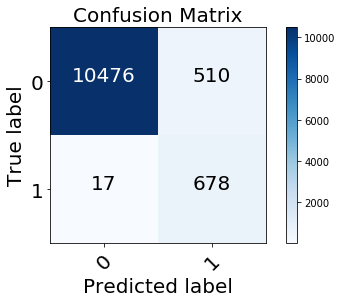

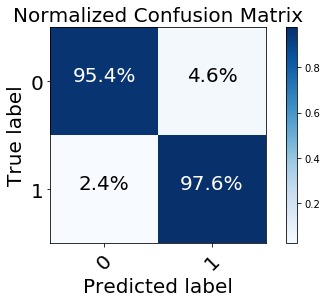

In [13]:
#Basic XGB Classifier
clf_XGB = xgboost.XGBClassifier(n_jobs=8)
clf_XGB.fit(train_data, train_labels)
summarize_results(clf_XGB)

The results of the XGBoost classifier were also very promising.  They weren't quite as good as the Random Forest, but they were very close.

### XGBoost with GridSearchCV

We next tried XGBoost with GridSearchCV to further tune our parameters:

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

Accuracy: 97.70%
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10986
          1       0.62      0.98      0.76       695

avg / total       0.98      0.96      0.97     11681

Confusion Matrix
[[10571   415]
 [   16   679]]
Normalized Confusion Matrix
[[0.96 0.04]
 [0.02 0.98]]


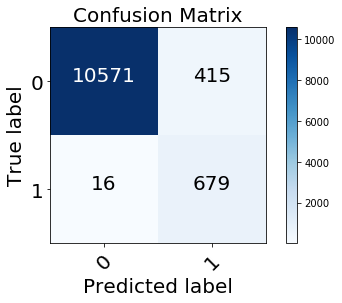

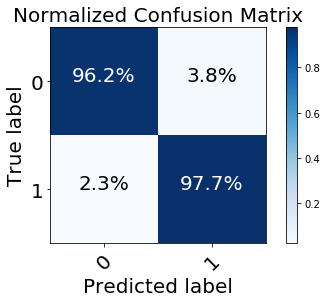

In [14]:
#XGB Classifier with Grid Search
tuned_parameters = [{'reg_lambda': [0.01],
                     #'learning_rate': [0.01, 0.1, 1],
                     #'max_depth': [3, 5, 7, 9],
                     'max_depth': [5],  #Landed on 5
                     #'min_child_weight': [1, 3, 5],
                     'min_child_weight': [1],  #Landed on 1
                     #'gamma':[i/10.0 for i in range(0,5)],
                     'gamma':[0.01],  #Landed on 0.01
                     #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100], #NEXT TRY THIS, BUT NOT WITH COMBO ABOVE
                     'reg_alpha':[0.1],
                    }]

scores = ['precision', 'recall']
# scorers = {'AUC': 'roc_auc', 'Recall': 'recall'}

clf_GS_XGB = GridSearchCV(xgboost.XGBClassifier(n_jobs=8),
                   tuned_parameters,
                   #cv=4,
                   scoring='recall')
clf_GS_XGB.fit(train_data, train_labels)
summarize_results(clf_GS_XGB)

As shown above, we were able to get results that slightly exceeded the Random Forest model.

To keep the run time down, we commented out the cells that ran multiple tuning parameters.  However, the results of those trials are as follows:

Output of 'print(clf_GS_XGB.grid\_scores\_)':

**Tuning max depth and min child weight**

* mean: 0.96971, std: 0.00072, params: {'max_depth': 3, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.96990, std: 0.00064, params: {'max_depth': 3, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.96990, std: 0.00061, params: {'max_depth': 3, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00023, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97042, std: 0.00014, params: {'max_depth': 5, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.96983, std: 0.00055, params: {'max_depth': 5, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.96994, std: 0.00048, params: {'max_depth': 7, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00125, params: {'max_depth': 7, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.97031, std: 0.00026, params: {'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00096, params: {'max_depth': 9, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97057, std: 0.00115, params: {'max_depth': 9, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00024, params: {'max_depth': 9, 'min_child_weight': 5, 'reg_lambda': 0.01}

**Tuning reg_alpha (with optimal values from above)**

* mean: 0.97005, std: 0.00018, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1e-05, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00052, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.01, 'reg_lambda': 0.01}
* mean: 0.97016, std: 0.00016, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97009, std: 0.00045, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 0.01}
* mean: 0.96738, std: 0.00057, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 100, 'reg_lambda': 0.01}

**Tuning gamma (with optimal values from above)**

* mean: 0.97016, std: 0.00016, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97020, std: 0.00029, params: {'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97001, std: 0.00028, params: {'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97016, std: 0.00083, params: {'gamma': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00056, params: {'gamma': 0.4, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}

In [15]:
print(clf_GS_XGB.score(dev_data, dev_labels))

0.9769784172661871


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Results Discussion

TBD.  Cameron to write up.

Talk about 679 .... 415

# 4. Calculating Probabilities

TBD.  Aaron to write.

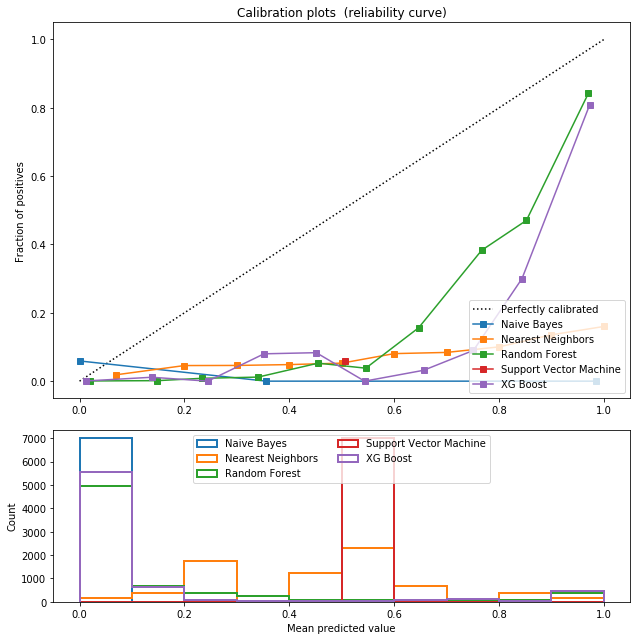

In [18]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, log_loss)

plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_NB_Gauss, 'Naive Bayes'), 
                  (clf_neigh, 'Nearest Neighbors'),
                  (clf_RF, 'Random Forest'),
                  (clf_SVM, 'Support Vector Machine'),
                  (clf_XGB, 'XG Boost')]:
    #Extract positive probablities from each of the models tested in order to plot
    prob_pos = clf.predict_proba(test_data)[:, 1]
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_labels, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [19]:
#Fit isotonic and sigmoid calibration to the XG Boost Model
clf_isotonic = CalibratedClassifierCV(clf_XGB, cv = 2, method = 'isotonic')
clf_isotonic.fit(train_data, train_labels)
prob_pos_isotonic = clf_isotonic.predict_proba(test_data)

clf_sigmoid = CalibratedClassifierCV(clf_XGB, cv = 2, method = 'sigmoid')
clf_sigmoid.fit(train_data, train_labels)
prob_pos_sigmoid = clf_isotonic.predict_proba(test_data)

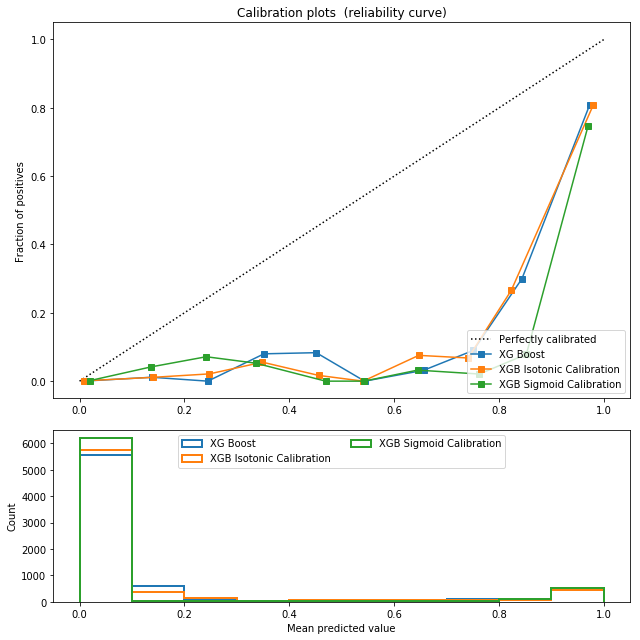

In [20]:
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_XGB, 'XG Boost'),
                 (clf_isotonic, 'XGB Isotonic Calibration'),
                 (clf_sigmoid, 'XGB Sigmoid Calibration')]:
    #Extract positive probablities from each of the models tested in order to plot
    prob_pos = clf.predict_proba(test_data)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(test_labels, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [ ]:
#AARON:  Feel free to keep or remove any / all of the code in this cell. It was my poor man's attempt at calibration.
#What you have is probably better.
print(clf_GS_XGB.predict_proba(dev_data))
print()

clf_current = clf_GS_XGB

df_prob = pd.concat([pd.DataFrame(clf_current.predict_proba(dev_data)), dev_labels.to_frame()], axis=1)

for i in range(1,20):    
    bin_prob = df_prob[(df_prob[1] > i/20) & (df_prob[1] <= (i+1)/20)]
    prob_num = bin_prob.is_churn.sum()
    prob_den = len(bin_prob)
    print(i/20, 'to', (i+1)/20, prob_num, prob_den, prob_num / prob_den)

#Horrible at probabilties ... highly uncalibrated.
df_prob

# 5. Economic Impact

TBD

In [ ]:
#Gaurav to insert code here

# 6. Final Insights and Takeaways

Here are our insights and commentary from our analysis:

